# ***Lifecycle of a Data Science Projects***

1. Data Collection Statergy---from company side,3rd party APi's,Surveys,Surveys
2. Feature Engineering---Handling Missing Values

***Why are their Missing values?? Survey--Depression Survey***

1. They hesitate to put down the information
2. Survey informations are not that valid
3. Men--salary
4. Women---age
5. People may have died----NAN

***Data Science Projects---Dataset should be collected from multiple sources***

***What are the different types of Missing Data?***

# 1.  MISSING COMPLETELY AT RONDOM---> MCAR

***IT ASSUMNES THAT VARIABLE IS MCAR WE ARE USING MEAN, MEDIAN, MODE IMPUTATION HERE***

In [84]:
import pandas as pd
df=pd.read_csv(r'C:\EXCELR\KAGGLE\INSURANCE\TITANIC_train.csv',usecols=['Age','Fare','Survived'])
               
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [8]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [9]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [14]:
median=df.Age.median()
median

28.0

In [15]:
impute_nan(df,'Age',median)
df.head()

Survived   Age     Fare  Age_median
0         0  22.0   7.2500        22.0
1         1  38.0  71.2833        38.0
2         1  26.0   7.9250        26.0
3         1  35.0  53.1000        35.0
4         0  35.0   8.0500        35.0

In [18]:
df.head(6)

Survived   Age     Fare  Age_median
0         0  22.0   7.2500        22.0
1         1  38.0  71.2833        38.0
2         1  26.0   7.9250        26.0
3         1  35.0  53.1000        35.0
4         0  35.0   8.0500        35.0
5         0   NaN   8.4583        28.0

In [17]:
df['Age_median'].head(6)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    28.0
Name: Age_median, dtype: float64

In [19]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


In [21]:
import matplotlib.pyplot as plt
%matplotlib inline


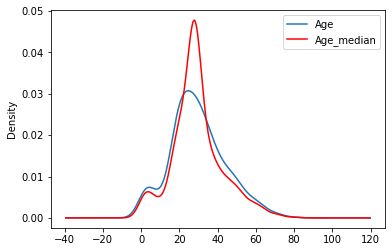

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


# Advantages And Disadvantages of Mean/Median Imputation

***Advantages***

1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete datase

***Disadvantages***

1. Change or Distortion in the original variance
2. Impacts Correlation

# 2.  RANDOM SAMPLE IMPUTATION

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? It assumes that the data are missing completely at random(MCAR)

In [24]:
import pandas as pd
df=pd.read_csv(r'C:\EXCELR\KAGGLE\INSURANCE\TITANIC_train.csv',usecols=['Age','Fare','Survived'])
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [25]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [27]:
df['Age'].isnull().sum()

177

***df['Age'].isnull().sum()----> IT GIVEN TOTAL 177 COUNT FOR THAT WE ARE USING random_state=0 TO APPLY THE SAMPLE IN RANDOM STATE 0


MEANS WHATEVER THE VALUES AFTER REMOVING FROM 

df['Age'].dropna() WE WILL GET VALUES WITHOUT "NAN", THE THOSE VALUES WILL BE FILLED TO THESE 177 NAN OBSERVATION THE DF

MEANS USING sample() FUNCTION IT FILLS THE SAMPLE VALUES GOT FROM THE DF WILL BE FILLED through random_state=0   ***

In [29]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [30]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [31]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [32]:
median=df.Age.median()
median

28.0

In [33]:
impute_nan(df,"Age",median)

In [34]:
df.head()

Survived   Age     Fare  Age_median  Age_random
0         0  22.0   7.2500        22.0        22.0
1         1  38.0  71.2833        38.0        38.0
2         1  26.0   7.9250        26.0        26.0
3         1  35.0  53.1000        35.0        35.0
4         0  35.0   8.0500        35.0        35.0

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

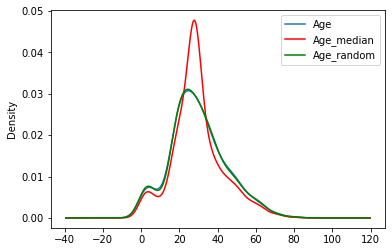

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

*** Advantages***
1. Easy To implement
2. There is less distortion in variance

*** Disadvantage***
1. Every situation randomness wont work

# 3. CAPTURING NAN VALUES WITH A NEW FEATURE

In [41]:
import pandas as pd
df=pd.read_csv(r'C:\EXCELR\KAGGLE\INSURANCE\TITANIC_train.csv',usecols=['Age','Fare','Survived'])
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [42]:
import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [43]:
df.head()

Survived   Age     Fare  Age_NAN
0         0  22.0   7.2500        0
1         1  38.0  71.2833        0
2         1  26.0   7.9250        0
3         1  35.0  53.1000        0
4         0  35.0   8.0500        0

In [44]:
df.Age.median()

28.0

In [45]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [46]:
df.head(10)

Survived   Age     Fare  Age_NAN
0         0  22.0   7.2500        0
1         1  38.0  71.2833        0
2         1  26.0   7.9250        0
3         1  35.0  53.1000        0
4         0  35.0   8.0500        0
5         0  28.0   8.4583        1
6         0  54.0  51.8625        0
7         0   2.0  21.0750        0
8         1  27.0  11.1333        0
9         1  14.0  30.0708        0

***Advantages***
1. Easy to implement
2. Captures the importance of missing values

***Disadvantages***

1. Creating Additional Features(Curse of Dimensionality)---> MEANS WE ARE CREATING NEW FEATURES HERE FOR GETTING TO KNOW OF MISSING VALUES IMPORTANCE. IN CASE OF SAME FEATURE PRESENT LIKE 10 FEATURES THEN WE SHOULD NOT USE THIS BECAUE IT CREATES 
10 EXTRA FEATURES AND LEADS TO CURSE OF DIMENSIONALITY

# 4.  END OF DISTRIBUTION IMPUTATION

In [68]:
import pandas as pd
df=pd.read_csv(r'C:\EXCELR\KAGGLE\INSURANCE\TITANIC_train.csv',usecols=['Age','Fare','Survived'])
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

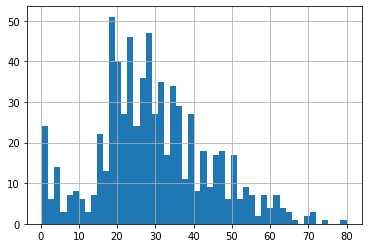

In [69]:
df.Age.hist(bins=50)

In [70]:
extreme=df.Age.mean()+3*df.Age.std()
# WHY WE ARE ADING MEAN HERE FOR 3RD STD IS WE KNOW VALUE TILL 3RD STD BUT WE WANT VALUE AFTER 3RD STD
# SO WE ADDING MEAN TO THAT MEAN+4RD STD VALUE THEN WE GET = EXTREME VALUE

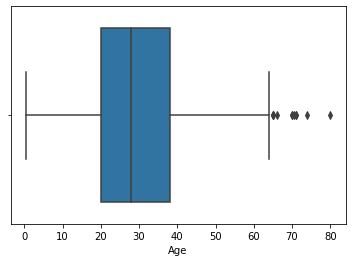

In [71]:
import seaborn as sns
sns.boxplot('Age',data=df)

***ADVANTAGE OF USING END OF DISTRUBUTION SOMETIMES IS CAN DEAL WITH OUTLIERS HOW COME WE ARE TALING EXTREME VALUES SO
THEN WITH EXTREME VALUE OUTLIERS WILL BE COVERED***

In [72]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [73]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [75]:
df.head()

Survived   Age     Fare  Age_end_distribution
0         0  22.0   7.2500                  22.0
1         1  38.0  71.2833                  38.0
2         1  26.0   7.9250                  26.0
3         1  35.0  53.1000                  35.0
4         0  35.0   8.0500                  35.0

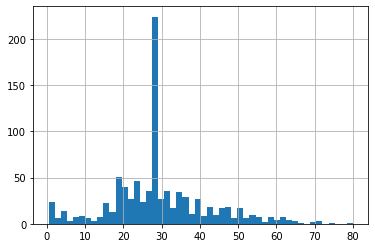

In [76]:
df['Age'].hist(bins=50)

*** WE COULD SEE THE COUNT=200+ BUT WHEN CALCULATED MEDIAN FOR THE ABOVE GRAPH 
THEN MOST OF THE MISSING VALUES MEDIAN IS COVERED IN MIDDLE ***

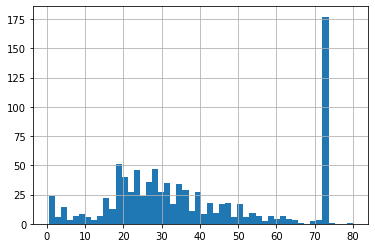

In [77]:
df['Age_end_distribution'].hist(bins=50)

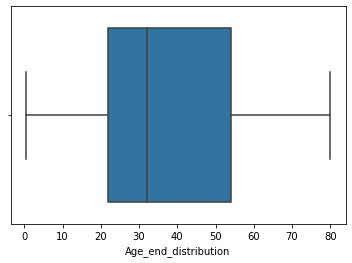

In [78]:
sns.boxplot('Age_end_distribution',data=df)

In [ ]:
#SO LIKE THIS WE COULD SEE THAT THE OUTLIERS ARE COVERED WITH EXTREME VALUE

# 5. ABITRARY VALUE IMPUTATION

***this technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value***

In [81]:
import pandas as pd
df=pd.read_csv(r'C:\EXCELR\KAGGLE\INSURANCE\train.csv',usecols=['Age','Fare','Survived'])
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [82]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

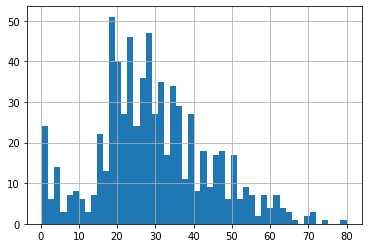

In [83]:
df['Age'].hist(bins=50)

*** Here we use last out leir or the least out lier to fill the NAN values***

***Advantages***

1. Easy to implement
2. Captures the missing value importance

***Disadvantages***

1. Hard to decide which value
2. mAsks the predictive power of analysis
3. Affects the distortion